<a href="https://colab.research.google.com/github/Aditi-dev07/Cisco_DataScience_Projects/blob/main/Data%20Cleaning/Whale%20heart%20rates/whale-heart-rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Blue Whale Heart Rates

By how much do blue whale heart rates change when they dive down to find food?

The file `blue-whale-heart-rates.csv` contains heart rate data (measured in beats per minute) for blue whales. The data captures the dynamics of their heart rates as they dive over one hundred meters deep to forage for food. The heart rate measurements are taken approximately every 10 seconds during 8 separate dives.

### Dive Phases
The data records the heart rates corresponding to different dive states:
1. Descent: The whale begins its dive, descending into the depths.
2. Lunging: The whale opens its mouth and lunges upward, engulfing prey and water.
3. Filtering: After lunging, the whale sinks slightly and filters out water to retain food.
4. Ascent: The whale returns to the surface to breathe, marking the end of a dive.
5.  Surface: The blue whale is now on the surface (upper 5 meters)

The lunging and filtering process may occur multiple times on a single dive. The next dive cycle begins with another descent.

In [2]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'blue-whale-heart-rates.csv'.

from google.colab import files
uploaded = files.upload()

Saving blue-whale-heart-rates.csv to blue-whale-heart-rates (1).csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('blue-whale-heart-rates.csv')
df.head()


,timestamp,heart_rate,dive_id,dive_phase
0,8/27/18 17:10:10,NaN,2,descent
1,8/27/18 17:10:22,5.24,2,descent
2,8/27/18 17:10:31,6.55,2,descent
3,8/27/18 17:10:40,NaN,2,descent
4,8/27/18 17:10:48,NaN,2,descent


### Project Ideas

#### Warmup
Calculate the average heart rates for each dive phase.

#### Challenge
Investigate the relationship between dive duration and the maximum heart rate at the surface following the dive.

1. Data Preparation:
	- Convert the `timestamp` column to datetime format.

2. Calculate Dive Duration:
	- For each `dive_id`, identify the earliest timestamp for the descent phase.
	- For each `dive_id`, find the latest timestamp for the ascent phase.
	- Compute the `dive_duration` by subtracting the start of the descent from the end of the ascent, then convert this duration to minutes (`dt.total_seconds() / 60`).
	- Store the results in a new dataframe with 2 columns: `dive_id` and `dive_duration`.

3. Determine Maximum Surface Heart Rate:
	- Identify the maximum heart rate recorded at the surface after each dive.
	- Store the results in a new dataframe with 2 columns: `dive_id` and `max_surface_heart_rate`

4. Merge DataFrames:
	- Merge the dive duration and max surface heart rate dataframes.

5.	Visualize the Data:
	- Generate a scatter plot with dive duration on the x-axis and maximum surface heart rate on the y-axis to illustrate their relationship.

Calculate the average heart rates for each dive phase.

In [46]:
avrg_heart_rate = df.groupby('dive_phase')['heart_rate'].mean()
avrg_heart_rate

,heart_rate
dive_phase,
ascent,21.074674
descent,12.415138
filter,8.143868
lunge,13.940597
surface,28.744397


##Data Preparation:

In [47]:
df.timestamp = pd.to_datetime(df.timestamp)
df.head()

,timestamp,heart_rate,dive_id,dive_phase
0,2018-08-27 17:10:10,23.180616,2,descent
1,2018-08-27 17:10:22,5.240000,2,descent
2,2018-08-27 17:10:31,6.550000,2,descent
3,2018-08-27 17:10:40,23.180616,2,descent
4,2018-08-27 17:10:48,23.180616,2,descent


In [48]:
df.isnull().sum()

,0
timestamp,0
heart_rate,0
dive_id,0
dive_phase,0


In [49]:
mean_heart_rate = df['heart_rate'].mean()
df['heart_rate'].fillna(mean_heart_rate, inplace=True)
print(f"Heart rate NaNs after filling: {df['heart_rate'].isnull().sum()}")

Heart rate NaNs after filling: 0


/tmp/ipython-input-2206649030.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['heart_rate'].fillna(mean_heart_rate, inplace=True)


##Calculate Dive Duration:

###For each dive_id, identify the earliest timestamp for the descent phase.

In [50]:
earliest_descent_timestamps = df.query('dive_phase == "descent"').groupby('dive_id')['timestamp'].max().reset_index()
earliest_descent_timestamps.rename(columns={'timestamp': 'descent_start_time'}, inplace=True)
earliest_descent_timestamps.head()

,dive_id,descent_start_time
0,2,2018-08-27 17:12:11
1,3,2018-08-27 17:27:12
2,4,2018-08-27 17:42:31
3,5,2018-08-27 17:53:38
4,7,2018-08-27 18:13:19


###For each dive_id, find the latest timestamp for the ascent phase.

In [51]:
latest_ascent_timestamps = df.query('dive_phase == "ascent"').groupby('dive_id')['timestamp'].min().reset_index()
latest_ascent_timestamps.rename(columns={'timestamp': 'ascent_end_time'}, inplace=True)
latest_ascent_timestamps.head()

,dive_id,ascent_end_time
0,2,2018-08-27 17:20:09
1,3,2018-08-27 17:35:24
2,4,2018-08-27 17:47:29
3,5,2018-08-27 17:58:53
4,7,2018-08-27 18:20:44


###Compute the dive_duration by subtracting the start of the descent from the end of the ascent, then convert this duration to minutes (dt.total_seconds() / 60).

In [52]:
dive_durations = earliest_descent_timestamps.merge(latest_ascent_timestamps, on='dive_id', how='left')
dive_durations['dive_duration'] = ((dive_durations['ascent_end_time'] - dive_durations['descent_start_time']).dt.total_seconds() / 60).round(2)
dive_durations.head()

,dive_id,descent_start_time,ascent_end_time,dive_duration
0,2,2018-08-27 17:12:11,2018-08-27 17:20:09,7.97
1,3,2018-08-27 17:27:12,2018-08-27 17:35:24,8.20
2,4,2018-08-27 17:42:31,2018-08-27 17:47:29,4.97
3,5,2018-08-27 17:53:38,2018-08-27 17:58:53,5.25
4,7,2018-08-27 18:13:19,2018-08-27 18:20:44,7.42


##Store the results in a new dataframe with 2 columns: dive_id and dive_duration

In [53]:
new_df = dive_durations[['dive_id', 'dive_duration']]
new_df.head()

,dive_id,dive_duration
0,2,7.97
1,3,8.20
2,4,4.97
3,5,5.25
4,7,7.42


##Determine Maximum Surface Heart Rate:

Identify the maximum heart rate recorded at the surface after each dive

In [54]:
max_surface_heart_rate = df.query('dive_phase == "surface"').groupby('dive_id')['heart_rate'].max().reset_index()
max_surface_heart_rate.rename(columns={'heart_rate': 'max_surface_heart_rate'}, inplace=True)
max_surface_heart_rate

,dive_id,max_surface_heart_rate
0,2,35.50
1,3,35.29
2,4,34.48
3,5,33.90
4,7,33.52
5,10,35.29
6,11,38.22
7,13,34.88


##Merge DataFrames:

##Merge the dive duration and max surface heart rate dataframes.

In [55]:
merged_df = new_df.merge(max_surface_heart_rate, on='dive_id', how='left')
merged_df.head()

,dive_id,dive_duration,max_surface_heart_rate
0,2,7.97,35.50
1,3,8.20,35.29
2,4,4.97,34.48
3,5,5.25,33.90
4,7,7.42,33.52


##Visualize the Data

##Generate a scatter plot with dive duration on the x-axis and maximum surface heart rate on the y-axis to illustrate their relationship.

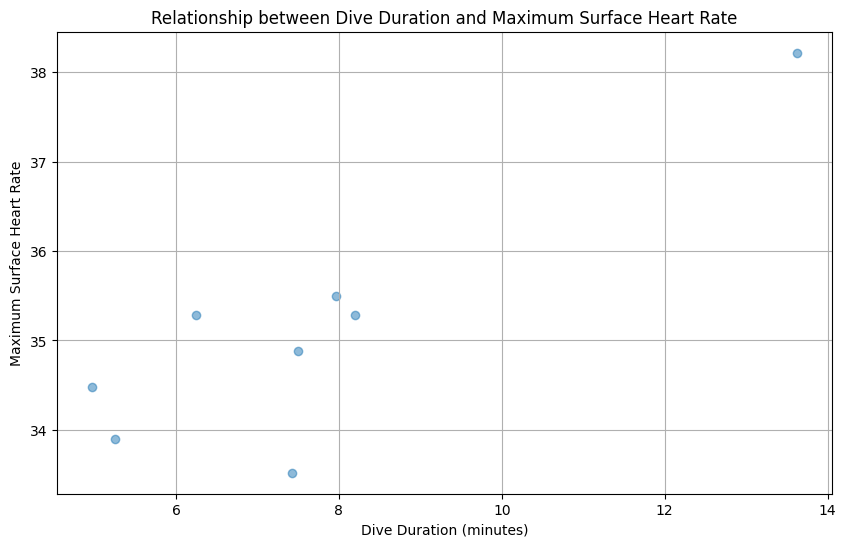

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['dive_duration'], merged_df['max_surface_heart_rate'], alpha=0.5)
plt.xlabel('Dive Duration (minutes)')
plt.ylabel('Maximum Surface Heart Rate')
plt.title('Relationship between Dive Duration and Maximum Surface Heart Rate')
plt.grid(True)
plt.show()